# Gender Classification with Deep Learning
Bu projede derin öğrenme kullanarak cinsiyet ayrımı yapabilen bir model geliştirilecektir. Model için gerekli resimler bing_image_downloader kütüphanesi kullanılarak indirilmiş ve male, female isimleri ile etiketlenmiştir.<br><br>
<img src="https://idilsuaydin.av.tr/wp-content/uploads/2021/02/cinsiyet-degistirme-ameliyati-tibbi-hukuki-sureci.jpg" width=300>

### Veri Setinin Oluşturulması

In [1]:
# pip install bing-image-downloader

In [2]:
#from bing_image_downloader import downloader

In [3]:
#downloader.download("female", limit=300)
#downloader.download("male", limit=300)

Elde edilen resimler içerisinde eğitimi olumsuz etkileyecek olanlar ayıklanmış ve geriye 123 erkek, 111 kadın resmi ile
eğitim yapılmıştır.

### Görüntü ön işleme

In [4]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
img_path="dataset/"
labels = ["female", "male"]

In [6]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)

In [7]:
df=pd.DataFrame({"img":img_list, "label":label_list})

In [8]:
df["label"].value_counts()

label
male      123
female    111
Name: count, dtype: int64

In [9]:
df.sample(10)

,img,label
195,dataset/male/Image_54.jpg,male
229,dataset/male/Image_92.jpg,male
60,dataset/female/Image_33.jpg,female
106,dataset/female/Image_86.jpg,female
93,dataset/female/Image_69.jpg,female
166,dataset/male/Image_25.png,male
133,dataset/male/Image_16.jpg,male
227,dataset/male/Image_90.jpg,male
47,dataset/female/Image_23.jpg,female
86,dataset/female/Image_60.jpg,female


In [10]:
d={"female":0, "male":1}

In [11]:
df["encode_label"]= df["label"].map(d)

In [12]:
df.sample(5)

,img,label,encode_label
8,dataset/female/Image_111.jpg,female,0
175,dataset/male/Image_30.jpg,male,1
128,dataset/male/Image_146.jpg,male,1
189,dataset/male/Image_48.jpg,male,1
201,dataset/male/Image_62.jpg,male,1


In [13]:
img=cv2.imread(str(df["img"][0]))
img.shape

(1100, 2000, 3)

In [14]:
size=256
x=[]
for imge in df["img"]:
    img=cv2.imread(str(imge))
    #print(imge)
    img=cv2.resize(img, (size,size))
    img=img/255.0 
    x.append(img)

In [15]:
len(x)

234

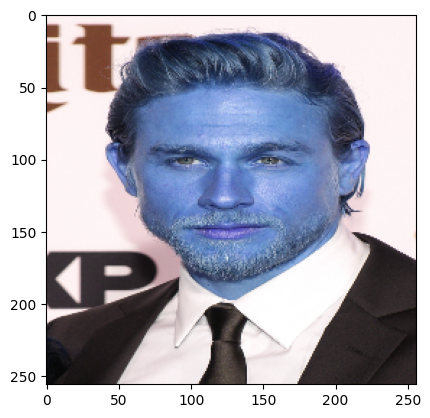

In [16]:
plt.imshow(x[200])

In [17]:
x=np.array(x)
y=df['encode_label']

### Modelleme

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [19]:
import tensorflow as tf
from keras.models import Sequential+
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
sess = tf.compat.v1.Session()

In [20]:
model = Sequential()
model.add(Input(shape=(size, size, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, verbose=1)

Epoch 1/50
6/6 [==============================] - 7s 500ms/step - loss: 9.8848 - accuracy: 0.5455 - val_loss: 1.4099 - val_accuracy: 0.4681
Epoch 2/50
6/6 [==============================] - 1s 135ms/step - loss: 3.9152 - accuracy: 0.7219 - val_loss: 2.4056 - val_accuracy: 0.4468
Epoch 3/50
6/6 [==============================] - 1s 133ms/step - loss: 1.6806 - accuracy: 0.8289 - val_loss: 5.9872 - val_accuracy: 0.4681
Epoch 4/50
6/6 [==============================] - 1s 131ms/step - loss: 0.9036 - accuracy: 0.8824 - val_loss: 6.6324 - val_accuracy: 0.4255
Epoch 5/50
6/6 [==============================] - 1s 133ms/step - loss: 0.6599 - accuracy: 0.9358 - val_loss: 8.1713 - val_accuracy: 0.4255
Epoch 6/50
6/6 [==============================] - 1s 131ms/step - loss: 0.6684 - accuracy: 0.9144 - val_loss: 6.7501 - val_accuracy: 0.4681
Epoch 7/50
6/6 [==============================] - 1s 133ms/step - loss: 0.4688 - accuracy: 0.9412 - val_loss: 5.9184 - val_accuracy: 0.5106
Epoch 8/50
6/6 [====

In [22]:
loss, accuracy = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 33ms/step - loss: 10.4165 - accuracy: 0.4681


In [23]:
accuracy

0.4680851101875305

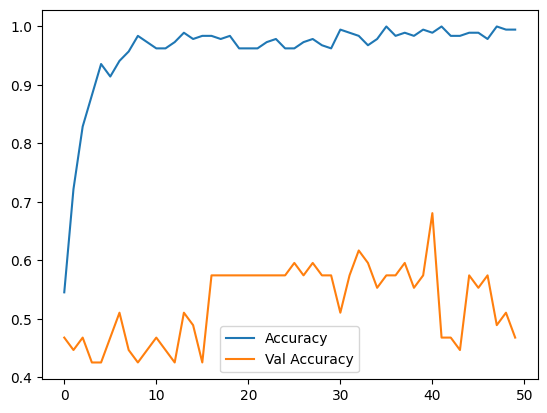

In [24]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [25]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [26]:
pred = model.predict(x_test)

2/2 [==============================] - 0s 26ms/step


In [27]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[15,  5],
       [20,  7]], dtype=int64)

1/1 [==============================] - 0s 32ms/step


('female', array([[1., 0.]], dtype=float32))

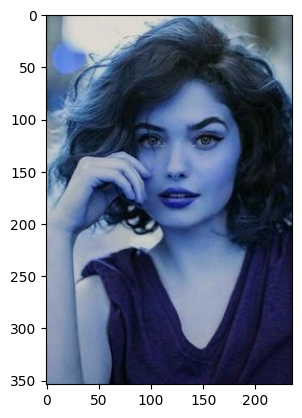

In [35]:
#dataset/female/Image_57.jpeg
img="dataset/test/female1.jpg"
img=cv2.imread(img)
plt.imshow(img)
img=cv2.resize(img, (size,size))
img=img/255.0 
img=np.array(img)
img=np.expand_dims(img, axis=0)
tahmin=model.predict(img)
labels[np.argmax(tahmin)], np.round(tahmin,3)

1/1 [==============================] - 0s 266ms/step


('female', array([[0.97, 0.03]], dtype=float32))

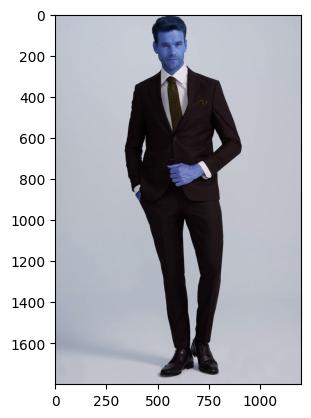

In [51]:
#dataset/female/Image_57.jpeg
img="dataset/test/male1.jpg"
img=cv2.imread(img)
plt.imshow(img)
img=cv2.resize(img, (size,size))
img=img/255.0 
img=np.array(img)
img=np.expand_dims(img, axis=0)
tahmin=model.predict(img)
labels[np.argmax(tahmin)], np.round(tahmin,2)

In [29]:
sess.close()

### Transfer Learning
Modeli kaydedip bir streamlit uygulamasına dönüştürelim. Uygulamada deneme amaçlı resimler tahmin edildikten sonra sonucun doğru veya yanlış olduğu geribildirimi ile makine eğitilmeye devam edilecektir.

In [34]:
model.save("gender_model.h5")

### Sonuç: 
Bu projede bing_image_downloader kütüphanesi kullanılarak internetten indirilen kadın ve erkek resimleri ile derin öğrenme modeli geliştirilmiştir. Modelin başarısı çok düşük olmasına rağmen model kaydedilerek Streamlit uygulamasına dönüştürülmüştür. Burada amaç düşük başarısına rağmen, her yeni fotoğraf yüklendikçe modelin eğitimine devam ederek zaman içerisinde başarısını artırmaktır.<br><br>
Hazırlanan uygulamaya <a href="https://huggingface.co/spaces/abdullatifkaban/Cinsiyet_Siniflandirma" target=_blank>Hugging Face</a> üzerinden ulaşılabilir.